In [24]:
import numpy as np
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Blank Image


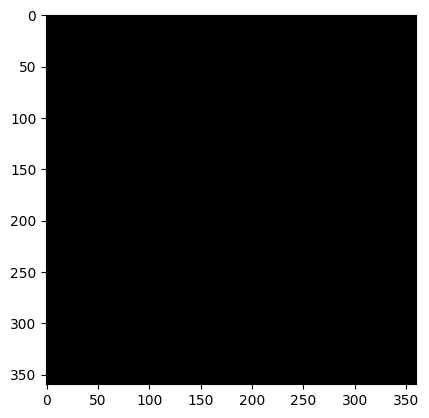

In [25]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

FOCAL_RADIUS = 30

GAUSSIAN_BLUR_KERNEL_SIZE = (3, 3)
GAUSSIAN_BLUR_SD = 10

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

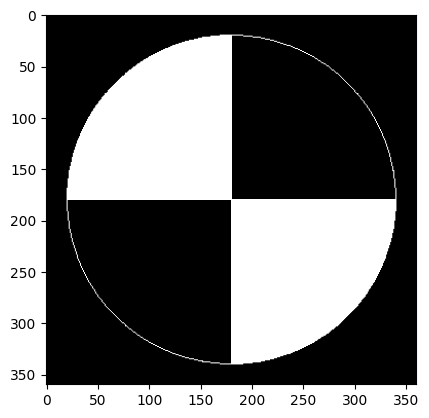

In [26]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

original_image = image.copy()

Region with focal radius : 30




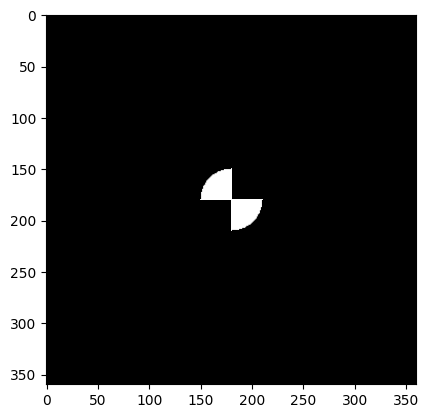

image with focal point at center initially


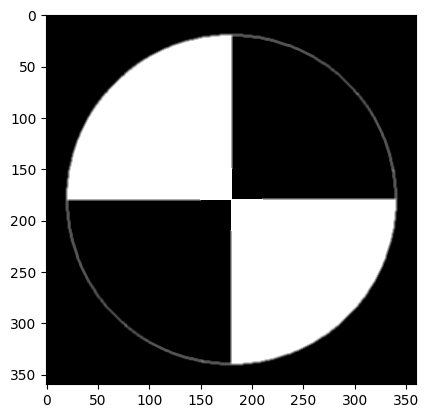

Variance map


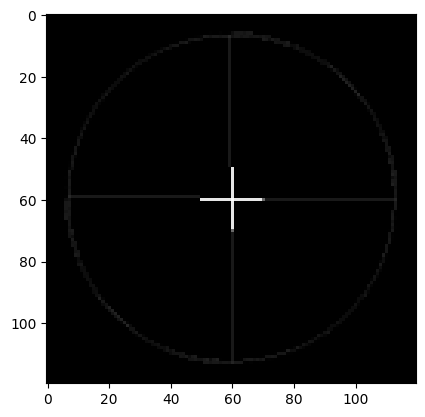

In [27]:
image = original_image.copy()

blurred_image = cv2.GaussianBlur(image, GAUSSIAN_BLUR_KERNEL_SIZE, GAUSSIAN_BLUR_SD)

mask = np.zeros(IMG_DIMS, dtype=np.uint8)
non_blurred_region = cv2.circle(mask, CENTER, FOCAL_RADIUS, (255, 255, 255), -1)
non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
print('Region with focal radius : ' + str(FOCAL_RADIUS) + '\n\n')
plt.imshow(non_blurred_region, cmap='gray')
plt.show()

blurred_image_copy = blurred_image.copy()
blurred_image_copy = cv2.circle(blurred_image_copy, CENTER, FOCAL_RADIUS, (0, 0, 0), -1)
image = blurred_image_copy +  non_blurred_region

print('image with focal point at center initially')
plt.imshow(image, cmap='gray')
plt.show()

laplacian_filter_4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_mask = cv2.filter2D(image, -1, laplacian_filter_4)

variances = []
for x in range(0, IMG_DIMS[0]//3):
    for y in range(0, IMG_DIMS[1]//3):
        i = x * 3
        j = y * 3
        variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
        edge_mask[i+1,j+2]
        ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

print('Variance map')
variance_image = np.array(variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)
plt.imshow(abs(variance_image), cmap='gray')

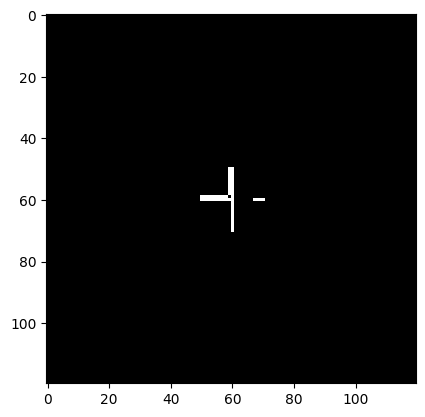

DETECTED FOCAL POINT :  (203, 180)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  23 0
Actual translation :  [10, 0]
DETECTED FOCAL POINT :  (155, 160)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -25 -20
Actual translation :  [10, 0]


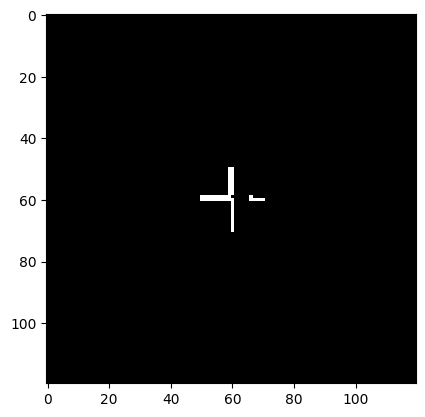

DETECTED FOCAL POINT :  (200, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  20 -2
Actual translation :  [9, 1]
DETECTED FOCAL POINT :  (155, 160)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -25 -20
Actual translation :  [9, 1]


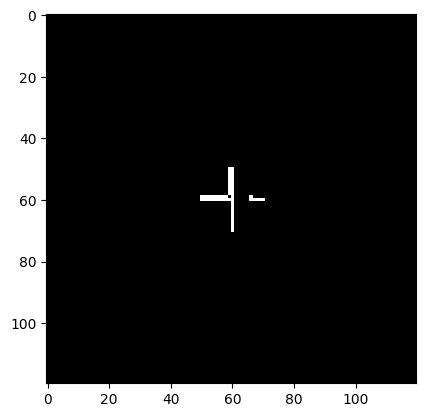

DETECTED FOCAL POINT :  (200, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  20 -2
Actual translation :  [9, 3]
DETECTED FOCAL POINT :  (155, 160)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -25 -20
Actual translation :  [9, 3]


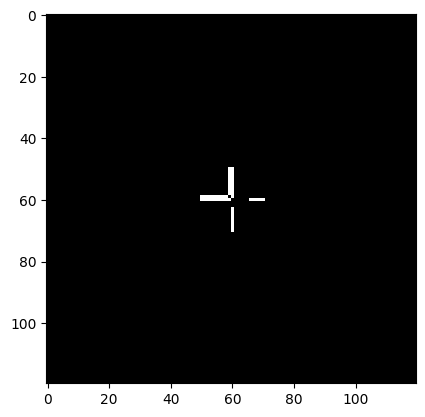

DETECTED FOCAL POINT :  (180, 193)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  0 13
Actual translation :  [8, 4]
DETECTED FOCAL POINT :  (200, 180)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  20 0
Actual translation :  [8, 4]
DETECTED FOCAL POINT :  (155, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -25 -25
Actual translation :  [8, 4]


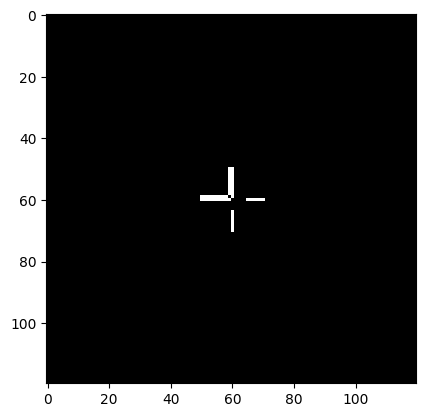

DETECTED FOCAL POINT :  (180, 195)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  0 15
Actual translation :  [7, 6]
DETECTED FOCAL POINT :  (198, 180)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  18 0
Actual translation :  [7, 6]
DETECTED FOCAL POINT :  (155, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -25 -25
Actual translation :  [7, 6]


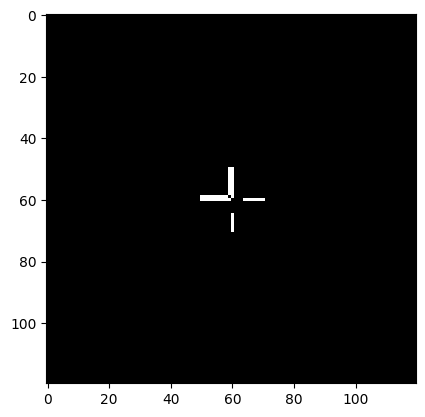

DETECTED FOCAL POINT :  (180, 198)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  0 18
Actual translation :  [6, 7]
DETECTED FOCAL POINT :  (195, 180)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  15 0
Actual translation :  [6, 7]
DETECTED FOCAL POINT :  (155, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -25 -25
Actual translation :  [6, 7]


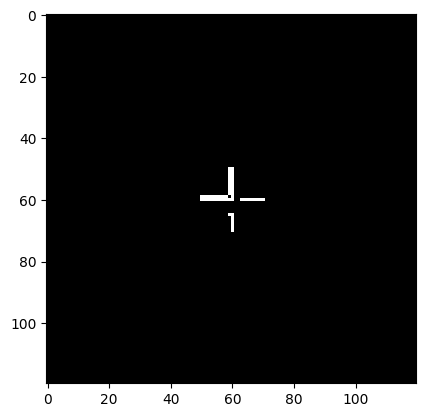

DETECTED FOCAL POINT :  (178, 198)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 18
Actual translation :  [5, 8]
DETECTED FOCAL POINT :  (193, 180)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  13 0
Actual translation :  [5, 8]
DETECTED FOCAL POINT :  (155, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -25 -25
Actual translation :  [5, 8]


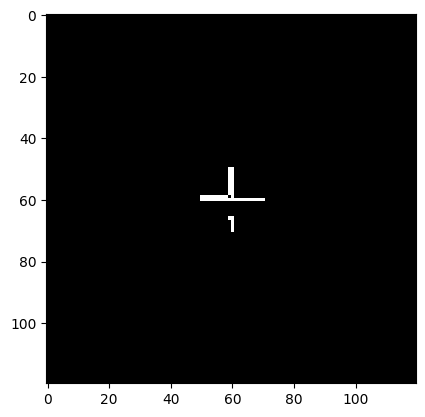

DETECTED FOCAL POINT :  (178, 200)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 20
Actual translation :  [3, 9]
DETECTED FOCAL POINT :  (160, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -20 -25
Actual translation :  [3, 9]


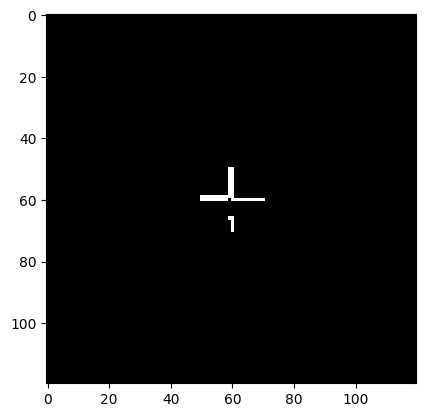

DETECTED FOCAL POINT :  (178, 200)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 20
Actual translation :  [1, 9]
DETECTED FOCAL POINT :  (160, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -20 -25
Actual translation :  [1, 9]


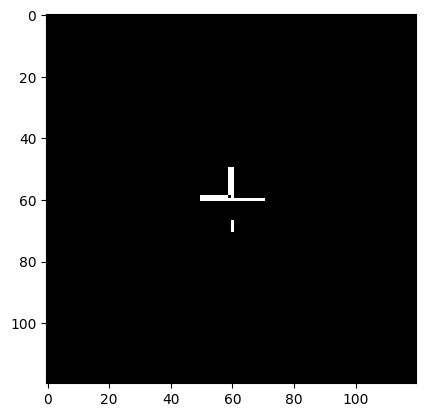

DETECTED FOCAL POINT :  (180, 203)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  0 23
Actual translation :  [0, 10]
DETECTED FOCAL POINT :  (160, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -20 -25
Actual translation :  [0, 10]


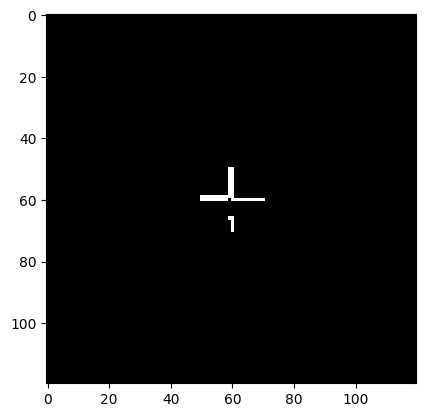

DETECTED FOCAL POINT :  (178, 200)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 20
Actual translation :  [-1, 9]
DETECTED FOCAL POINT :  (160, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -20 -25
Actual translation :  [-1, 9]


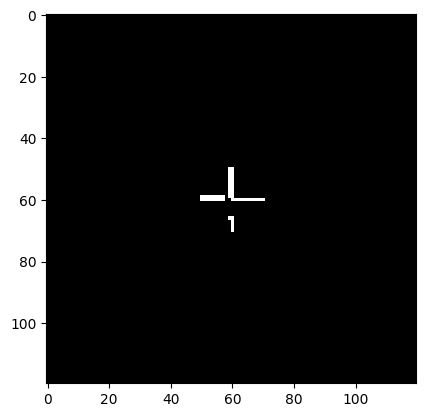

DETECTED FOCAL POINT :  (178, 200)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 20
Actual translation :  [-3, 9]
DETECTED FOCAL POINT :  (154, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -26 -2
Actual translation :  [-3, 9]
DETECTED FOCAL POINT :  (183, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -25
Actual translation :  [-3, 9]


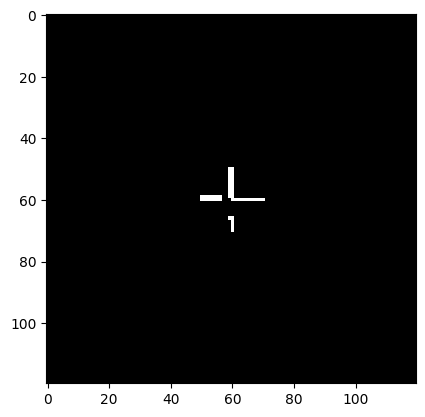

DETECTED FOCAL POINT :  (178, 200)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 20
Actual translation :  [-4, 8]
DETECTED FOCAL POINT :  (153, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -27 -2
Actual translation :  [-4, 8]
DETECTED FOCAL POINT :  (183, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -25
Actual translation :  [-4, 8]


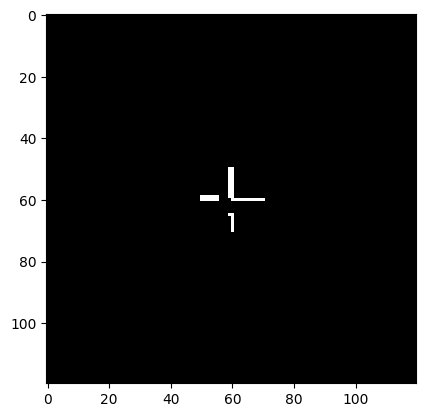

DETECTED FOCAL POINT :  (178, 198)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 18
Actual translation :  [-6, 7]
DETECTED FOCAL POINT :  (153, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -27 -2
Actual translation :  [-6, 7]
DETECTED FOCAL POINT :  (183, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -25
Actual translation :  [-6, 7]


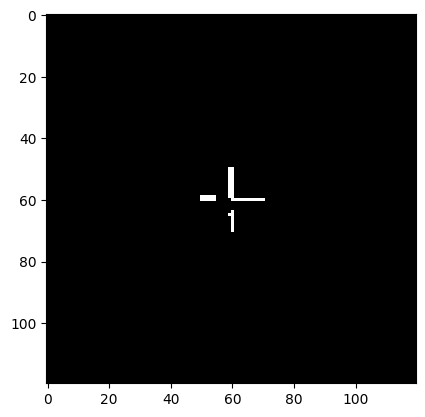

DETECTED FOCAL POINT :  (178, 195)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 15
Actual translation :  [-7, 6]
DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-7, 6]
DETECTED FOCAL POINT :  (183, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -25
Actual translation :  [-7, 6]


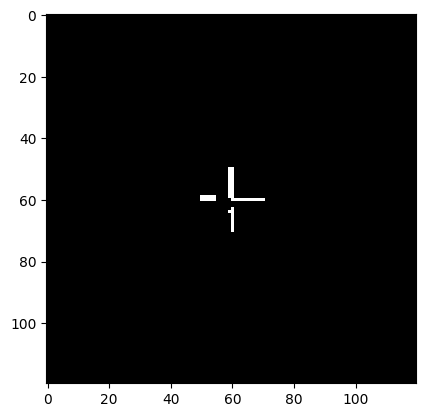

DETECTED FOCAL POINT :  (178, 193)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 13
Actual translation :  [-8, 4]
DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-8, 4]
DETECTED FOCAL POINT :  (183, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -25
Actual translation :  [-8, 4]


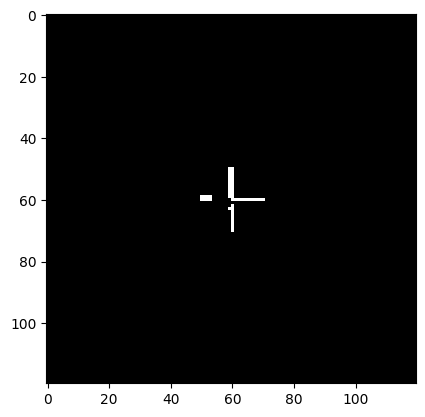

DETECTED FOCAL POINT :  (178, 190)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 10
Actual translation :  [-9, 3]
DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-9, 3]
DETECTED FOCAL POINT :  (183, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -25
Actual translation :  [-9, 3]


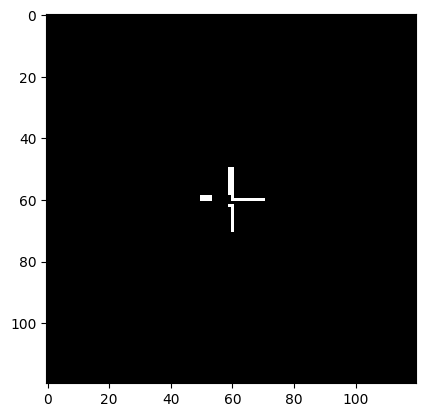

DETECTED FOCAL POINT :  (178, 190)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 10
Actual translation :  [-9, 1]
DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-9, 1]
DETECTED FOCAL POINT :  (183, 155)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -25
Actual translation :  [-9, 1]


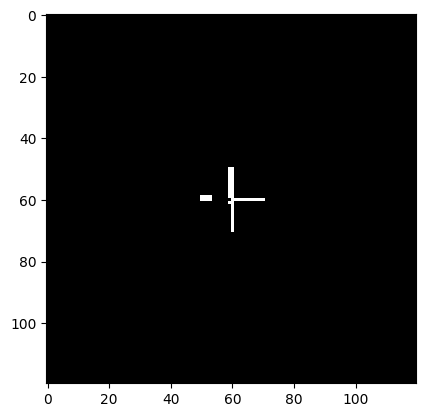

DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-10, 0]
DETECTED FOCAL POINT :  (183, 160)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -20
Actual translation :  [-10, 0]


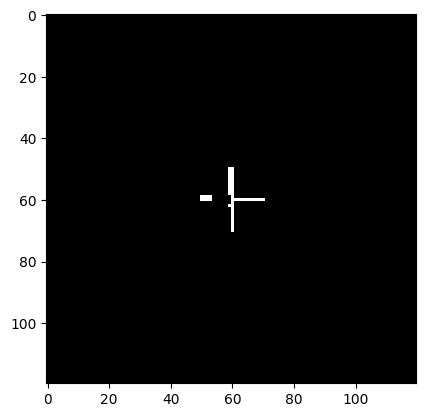

DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-9, -1]
DETECTED FOCAL POINT :  (183, 160)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -20
Actual translation :  [-9, -1]


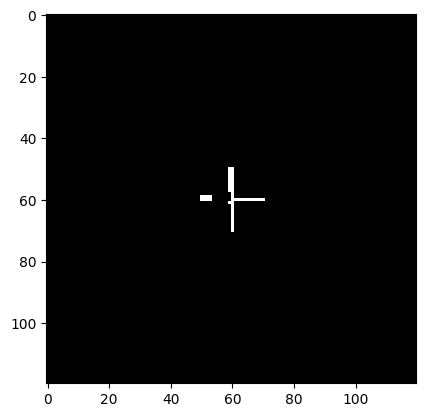

DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-9, -3]
DETECTED FOCAL POINT :  (183, 160)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 -20
Actual translation :  [-9, -3]


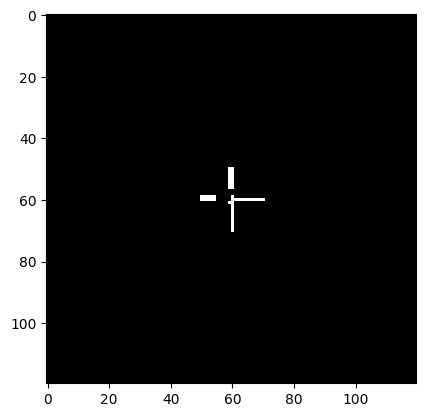

DETECTED FOCAL POINT :  (183, 183)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 3
Actual translation :  [-8, -5]
DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-8, -5]
DETECTED FOCAL POINT :  (178, 153)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 -27
Actual translation :  [-8, -5]


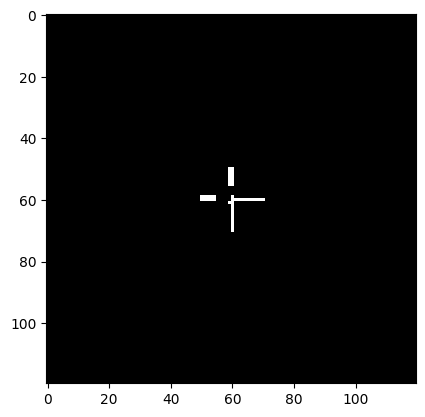

DETECTED FOCAL POINT :  (183, 183)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 3
Actual translation :  [-7, -6]
DETECTED FOCAL POINT :  (152, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -28 -2
Actual translation :  [-7, -6]
DETECTED FOCAL POINT :  (178, 153)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 -27
Actual translation :  [-7, -6]


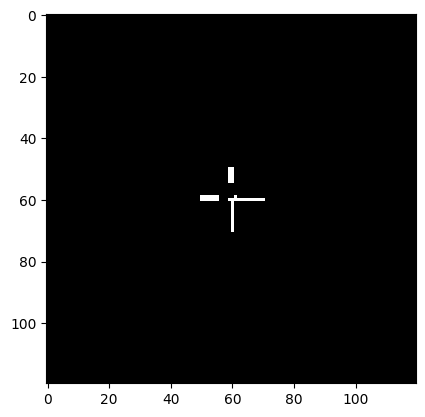

DETECTED FOCAL POINT :  (183, 183)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 3
Actual translation :  [-6, -7]
DETECTED FOCAL POINT :  (153, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -27 -2
Actual translation :  [-6, -7]
DETECTED FOCAL POINT :  (178, 152)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 -28
Actual translation :  [-6, -7]


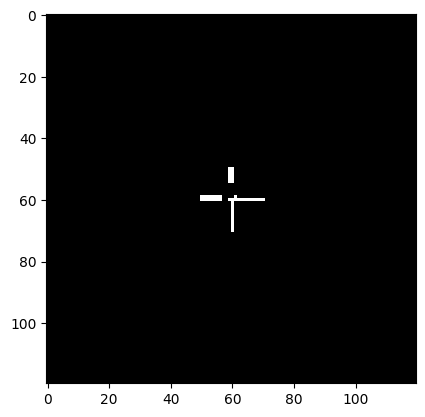

DETECTED FOCAL POINT :  (183, 183)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  3 3
Actual translation :  [-5, -8]
DETECTED FOCAL POINT :  (153, 178)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -27 -2
Actual translation :  [-5, -8]
DETECTED FOCAL POINT :  (178, 152)
ACTUAL FOCAL POINT  : (180, 180)
Predicted translation of focal point :  -2 -28
Actual translation :  [-5, -8]


KeyboardInterrupt: 

In [29]:
angles = []
translations = []
angle_diff = []
translation_diff = []

for i in range(0, 360, 10):
    for r  in range(10,11,10):

        t = [int(r * np.cos(np.radians(i))), int(r * np.sin(np.radians(i)))]
        FOCAL_RADIUS = int(r)
        image = original_image.copy()

        # Move the focal point to a random position.
        new_focal_point = (CENTER[0]+t[0],CENTER[1]+t[1])
        blurred_image = cv2.GaussianBlur(image, GAUSSIAN_BLUR_KERNEL_SIZE, GAUSSIAN_BLUR_SD)
        mask = np.zeros(IMG_DIMS, dtype=np.uint8)
        non_blurred_region = cv2.circle(mask, new_focal_point, FOCAL_RADIUS, (255, 255, 255), -1)
        non_blurred_region = cv2.bitwise_and(non_blurred_region, image)
        #print('Region with focal radius : ' + str(FOCAL_RADIUS) + '\n\n')
        #plt.imshow(non_blurred_region, cmap='gray')
        #plt.show()

        blurred_image_copy = blurred_image.copy()
        blurred_image_copy = cv2.circle(blurred_image_copy, new_focal_point, FOCAL_RADIUS, (0, 0, 0), -1)
        test_image = blurred_image_copy +  non_blurred_region

        #print('Test image with radius ', FOCAL_RADIUS, ' being sharp with rest as blurred')
        #plt.imshow(test_image, cmap='gray')
        #plt.show()
        #print('difference in test image and filtered non blurred region (in circular fasion)')
        #plt.imshow(np.abs(test_image - non_blurred_region), cmap='gray')
        #plt.show()
        #print('Visualization of separation of non blurred and blurred parts (radius = fr)')
        test_image_copy = test_image.copy()
        #plt.imshow(cv2.circle(test_image_copy, new_focal_point, FOCAL_RADIUS, (255, 0, 0), 1), cmap='gray')
        #plt.show()

        # Perform laplacian of Gaussian.
        edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_4)
        #print('Laplacian mask')
        #plt.imshow(edge_mask, cmap='gray')
        #plt.show()

        test_image_variances = []
        for x in range(0, IMG_DIMS[0]//3):
            for y in range(0, IMG_DIMS[1]//3):
                i = x * 3
                j = y * 3
                test_image_variances.append(np.var([edge_mask[i+0,j+0], edge_mask[i+0,j+1],edge_mask[i+0,j+2],edge_mask[i+1,j+0],edge_mask[i+1,j+1],
                edge_mask[i+1,j+2]
                ,edge_mask[i+2,j+0],edge_mask[i+2,j+1],edge_mask[i+2,j+2]]))

        test_image_variances = np.array(test_image_variances).reshape(IMG_DIMS[0]//3, IMG_DIMS[1]//3)

        #print('Variance map of image with shifted focal point : ')
        #plt.imshow(test_image_variances, cmap='gray')
        #plt.show()

        #print('Absolute difference in variance maps')
        #plt.imshow((np.abs(test_image_variances - variance_image)), cmap='gray')
        #plt.show()

        # Find the position of the focal point.
        absolute_diff_variance_map = np.abs(test_image_variances - variance_image)
        countours, b  = cv2.findContours(cv2.threshold(absolute_diff_variance_map, 255, 255, cv2.THRESH_BINARY)[1].astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        blank = np.zeros(cv2.threshold(absolute_diff_variance_map, 255, 255, cv2.THRESH_BINARY)[1].shape[:2], dtype='uint8')
        plt.imshow(cv2.drawContours(blank, countours, -1,(255, 0, 0), 1), cmap='gray')
        plt.show()
 
        for c in  countours:
            x,y,w,h = cv2.boundingRect(c)
            focal_point_position = ((int)((x) * 3 + w/2), (int)((y) * 3 + h/2)) 
            #if np.abs(focal_point_position[0] - CENTER[0] - t[0]) > 10 and np.abs(focal_point_position[1] - CENTER[1] - t[1]) > 10:
            #    print(focal_point_position, " and ", CENTER[0] + t[0],  " with ", CENTER[1] + t[1])
            #    
            #    continue

            print("DETECTED FOCAL POINT : ", focal_point_position)
            print("ACTUAL FOCAL POINT  :" , CENTER)
            print('Predicted translation of focal point : ', focal_point_position[0] -  CENTER[0], focal_point_position[1] - CENTER[1])
            print('Actual translation : ', t)
            test_variances = []
            comparison_index = 0
            for i in range(0, RADIUS, 1):
                edge_mask = cv2.filter2D(test_image, -1, laplacian_filter_4)
                mask = np.zeros(IMG_DIMS, dtype=np.uint8)
                curr_radius_check_range = cv2.circle(mask, focal_point_position, i, (255, 255, 255), -1)
                curr_region_to_check = cv2.bitwise_and(edge_mask, curr_radius_check_range)
                test_var = curr_region_to_check.var()

                edge_mask = cv2.filter2D(image, -1, laplacian_filter_4)
                mask = np.zeros(IMG_DIMS, dtype=np.uint8)
                curr_radius_check_range = cv2.circle(mask, focal_point_position, i, (255, 255, 255), -1)
                curr_region_to_check = cv2.bitwise_and(edge_mask, curr_radius_check_range)

                var = curr_region_to_check.var()


                if var != test_var:
                    #print('BLUR DETECTED AT RADIUS : ', i-1)
                    #print('FOR VERIFICATION : CORRECT fr WAS AT RADIUS : ', FOCAL_RADIUS)

                    # Correction parameters:
                    #print('ANGLE CORRECTION DETECTED : ', np.arctan2((focal_point_position[1] - CENTER[1]), (focal_point_position[0] - CENTER[0])))
                    #print('ACTUAL ANGLE              : ', np.arctan2((t[1]), (t[0])))
                    translation_diff.append([focal_point_position[0] - CENTER[0], focal_point_position[1] - CENTER[1]])
                    angle_diff.append(np.arctan2((focal_point_position[1] - CENTER[1]), (focal_point_position[0] - CENTER[0])) -  np.arctan2((t[1]), (t[0])))
                    translations.append(t)
                    angles.append(i)
                    
                    break
                comparison_index += 1

print('------------------------------------------------------\n\n\n\n\n\n\n\n\n\n\n\n')

In [ ]:
dict = {'angle diff': angle_diff, 'translation diff': translation_diff} 
    
df = pd.DataFrame(dict)


In [ ]:
from IPython.display import display
df.to_csv('../data/focal_correction.xls')